----------------------
## Exemplo 3 - Diagnóstico médico: Problemas Ortopédicos na Coluna Vertebral

Esse dataset contém dados sobre problemas ortopédicos na coluna vertebral, diagnosticados no Centre Médico-Chirurgical de Réadaptation des Massues, em Lyon, France. Contém 6 atributos biomecânicos para 310 entradas anonimizadas, sendo 100 de pacientes considerados sem problemas (Normal - NO), 60 de pacientes com Hérnia de Disco (Disk Hernia - DH) e 150 de pacientes com Espondilolistese (Spondylolisthesis - SL). 

O dataset está disponível em https://www.openml.org/d/1523

### Exemplo 3 - Primeiro passo: Carregar dados e Realizar a Análise Exploratória

Para importar dados do OpenML podemos usar uma função pronta na biblioteca do Scikit-Learn:

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
dados = fetch_openml(data_id=1523)

In [3]:
type(dados)

sklearn.utils.Bunch

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(dados.data,columns=dados.feature_names) 

In [6]:
df.head()

,V1,V2,V3,V4,V5,V6
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [7]:
dados.target_names

['Class']

In [8]:
print(list(dados.target).count('1'))
print(list(dados.target).count('2'))
print(list(dados.target).count('3'))

60
100
150


In [9]:
target_map={
    '1':'Disk Hernia',
    '2':'Normal',
    '3':'Spondylolisthesis'
}

In [10]:
df['diagnostic'] = [target_map[target] for target in dados.target]

df.head()

,V1,V2,V3,V4,V5,V6,diagnostic
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Disk Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Disk Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,Disk Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Disk Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Disk Hernia


In [11]:
import seaborn as sns

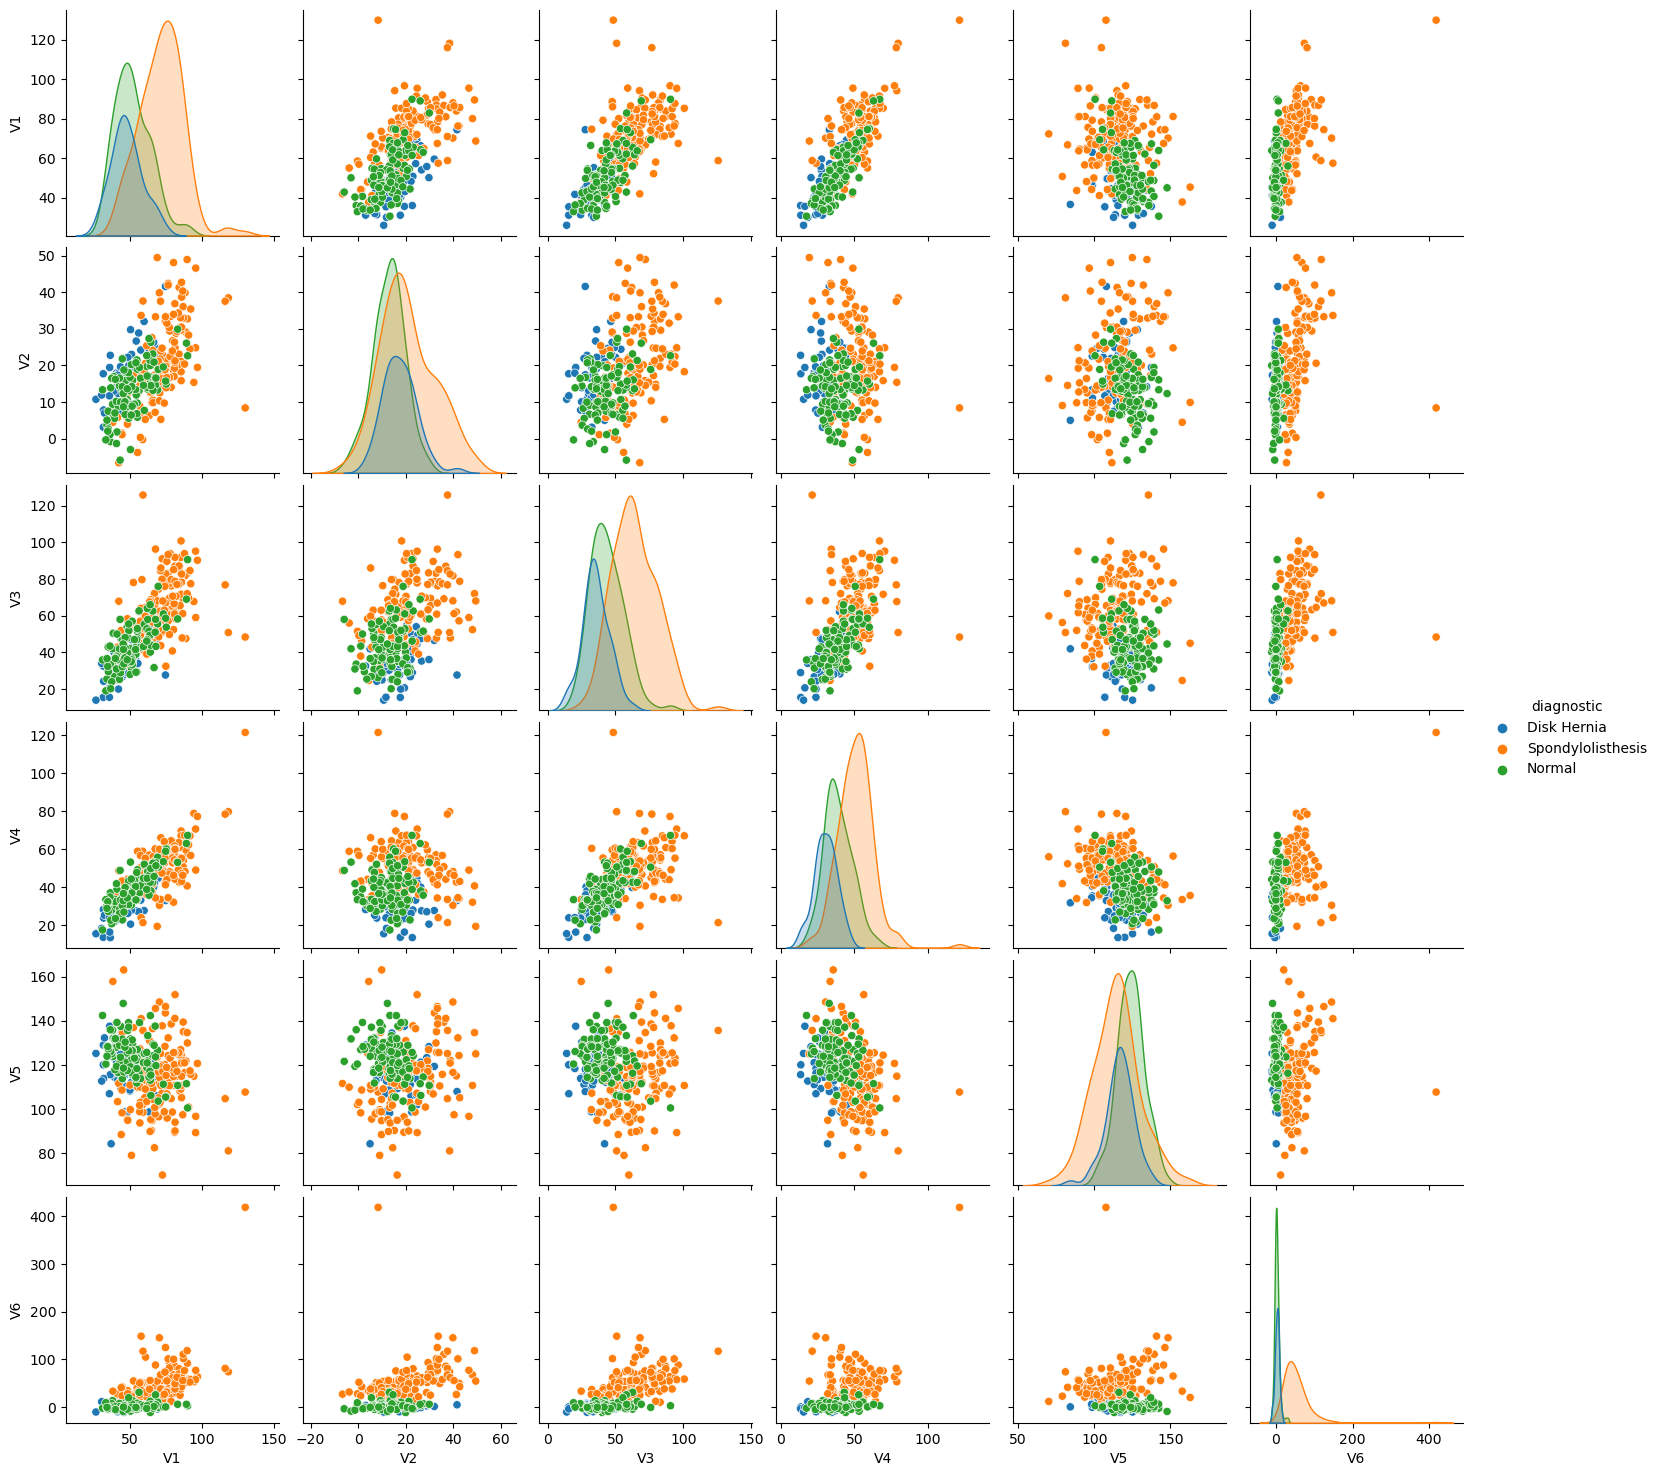

In [12]:
sns.pairplot(df, hue='diagnostic')

In [13]:
df.groupby('diagnostic').mean()

,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Disk Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Spondylolisthesis,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [14]:
df.groupby('diagnostic').std()

,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Disk Hernia,10.697131,7.016708,9.767795,7.555388,9.355720,5.531177
Normal,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483
Spondylolisthesis,15.109337,11.506169,16.397068,12.318813,15.579995,40.108030


### Segundo passo: separar os dados

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Escolhendo as colunas preditivas e alvo
x = df.drop(columns = ['diagnostic'])
y = df['diagnostic'] # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 8)

### Terceiro passo: transformar dados

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
# Instanciando o Escalonador
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Quarto passo: treinar o algoritmo 

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

LinearDiscriminantAnalysis()

### Quinto passo: testar e avaliar 

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [22]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = lda.predict(x_test_scaled)

In [23]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Disk Hernia','Normal','Spondylolisthesis'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, 
                              display_labels=['Disk Hernia','Normal','Spondylolisthesis'])
disp.plot(values_format='d') 

In [24]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

      Disk Hernia       1.00      0.50      0.67        12
           Normal       0.68      0.81      0.74        16
Spondylolisthesis       0.84      0.91      0.87        34

         accuracy                           0.81        62
        macro avg       0.84      0.74      0.76        62
     weighted avg       0.83      0.81      0.80        62



Obtivemos, no geral, uma acurácia baixa.

Além disso nosso Recall em relação a Hérnia de Disco é muito baixo (temos muitos falsos negativos - pacientes que não tem hérnia de disco classificados com hérnia de disco);

Nossa precisão para Normal também está baixa (temos muito falsos positivos - pacientes classificados como normal mas que tem algum problema);

Precisamos voltar ao **Passo 4** e mexer nos hiperparâmetros do nosso algoritmo ou escolher outro algoritmo de classificação. Vejamos outros algoritmos:

### De volta ao passo 4:

In [25]:
# Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

# Passo 4 - Treinar o Classificador
gnb = GaussianNB()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)
gnb.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = gnb.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

      Disk Hernia       0.78      0.58      0.67        12
           Normal       0.71      0.62      0.67        16
Spondylolisthesis       0.85      0.97      0.90        34

         accuracy                           0.81        62
        macro avg       0.78      0.73      0.75        62
     weighted avg       0.80      0.81      0.80        62



In [26]:
# k-vizinhos mais próximos (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Passo 4 - Treinar o Classificador
knn = KNeighborsClassifier() # Criando classificador (sem nenhum hiperparametro)
knn.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = knn.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

      Disk Hernia       0.67      0.50      0.57        12
           Normal       0.71      0.75      0.73        16
Spondylolisthesis       0.92      0.97      0.94        34

         accuracy                           0.82        62
        macro avg       0.76      0.74      0.75        62
     weighted avg       0.81      0.82      0.82        62



D:\arthu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
# Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

# Passo 4 - Treinar o Classificador
dtree = DecisionTreeClassifier() # Criando classificador (sem nenhum hiperparametro)
dtree.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = dtree.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

      Disk Hernia       0.86      0.50      0.63        12
           Normal       0.72      0.81      0.76        16
Spondylolisthesis       0.89      0.97      0.93        34

         accuracy                           0.84        62
        macro avg       0.82      0.76      0.78        62
     weighted avg       0.84      0.84      0.83        62



In [28]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

# Passo 4 - Treinar o Classificador
rf = RandomForestClassifier(random_state=42) # Criando classificador (hiperparametro de seed)
rf.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = rf.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

      Disk Hernia       0.86      0.50      0.63        12
           Normal       0.68      0.81      0.74        16
Spondylolisthesis       0.92      0.97      0.94        34

         accuracy                           0.84        62
        macro avg       0.82      0.76      0.77        62
     weighted avg       0.85      0.84      0.83        62



In [29]:
# Máquina de Vetor Suporte
from sklearn.svm import SVC

# Passo 4 - Treinar o Classificador
svm = SVC() # Criando classificador (sem nenhum hiperparametro)
svm.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = svm.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

      Disk Hernia       1.00      0.50      0.67        12
           Normal       0.71      0.94      0.81        16
Spondylolisthesis       0.94      0.97      0.96        34

         accuracy                           0.87        62
        macro avg       0.89      0.80      0.81        62
     weighted avg       0.89      0.87      0.86        62



In [30]:
# Regressão Logística 
from sklearn.linear_model import LogisticRegression

# Passo 4 - Treinar o Classificador
logreg = LogisticRegression() # Criando classificador (sem nenhum hiperparametro)
logreg.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = logreg.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

      Disk Hernia       0.88      0.58      0.70        12
           Normal       0.78      0.88      0.82        16
Spondylolisthesis       0.92      0.97      0.94        34

         accuracy                           0.87        62
        macro avg       0.86      0.81      0.82        62
     weighted avg       0.87      0.87      0.87        62



D:\arthu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nós testamos diferentes algoritmos de classificação. 

Perceba que a forma básica de todos eles é extremamente igual.

Os nuances começam a aparecer quando olhamos em mais detalhes os hiperparâmetros e como cada algoritmo funciona internamente.

Entre na documentação de cada um dos classificadores e tente usar diferentes hiperparâmetros para ver se você consegue melhorar a performance de algum deles.

Outra coisa é que certos algoritmos funcionam melhor se os dados fornecidos seguirem determinadas propriedades. Por isso é muito comum fazer uma etapa de pré-processamento dos dados na qual os dados são **transformados** para seguir determinada característica. É nesta etapa que fazemos os **escalonamento** dos dados. Volte ao **passo 3** e veja se o escalonamento influencia a resultado para cada um dos algoritmos testados.

Outro ponto é que podemos realizar uma busca exaustiva sobre quais são os melhores hipeparâmetros. Técnicas comuns para se fazer isso são o **GridSearch**, o **RandomSearch**, e a **Validação Cruzada**. 